# compare different stock api providers 

It's important to make sure the quality of the gathered data is good, not much missing or wrong data. The model can only do as well as the input data. This notebook is to compare the quality of the different api provided data. 


From this [blog](https://towardsdatascience.com/comparing-the-best-free-financial-market-data-apis-158ae73c16ba), the author gives a high level comparison of 5 api providers, IEX, Tiingo, Quandl, Alpha Vantage, and WorldTradingData. The author mainly concludes that IEX, Tiingo and Quandl
have better api documentation than Alpha Vantage, and WorldTradingData. 



In [50]:
# general imports

from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from pandas import json_normalize


## Alpha vantage

[api doc](https://www.alphavantage.co/documentation/) 

alpha_vantage python package [github](https://github.com/RomelTorres/alpha_vantage/tree/master) 


In [19]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators



In [30]:
# stock data API alpha_vantage, documentation https://www.alphavantage.co/documentation/
key = 'put your key here'
# Chose your output format, or default to JSON (python dict)
ts = TimeSeries(key, output_format='pandas')
ti = TechIndicators(key)

ticker='AAPL'
interval='1min'  # 1min, 5min, 15min, 30min, 60min
outputsize='full' # compact, full

# Get the data, returns a tuple
# aapl_data is a pandas dataframe, aapl_meta_data is a dict
aapl_data, aapl_meta_data = ts.get_intraday(symbol=ticker, interval=interval, outputsize=outputsize) #for intraday price, ts.get_intraday. Daily price, ts.get_daily
# aapl_sma is a dict, aapl_meta_sma also a dict
aapl_sma, aapl_meta_sma = ti.get_sma(symbol=ticker)

In [37]:

# returned data is for last 5 days, then get only one day's data


date = '2020-06-05'
date_obj = datetime.strptime(date, '%Y-%m-%d')

av_df= aapl_data[aapl_data.index > date_obj]
print(av_df.shape)
print(av_df.tail(15))
# print(av_df.head(15))

# df.to_csv('priceData.csv')
#read data from the csv file
#df=pd.read_csv('priceData.csv').set_index(['date'])



(387, 5)
                      1. open  2. high    3. low  4. close  5. volume
date                                                                 
2020-06-05 09:48:00  327.3600  327.850  327.2600  327.8100   132707.0
2020-06-05 09:47:00  327.2000  327.400  327.1200  327.3500   118407.0
2020-06-05 09:46:00  326.9500  327.310  325.6200  327.2600   237847.0
2020-06-05 09:45:00  326.5800  326.950  326.4400  326.9200   125969.0
2020-06-05 09:44:00  326.7100  326.730  326.4800  326.5858    91514.0
2020-06-05 09:43:00  326.6400  326.790  326.4328  326.7100    99651.0
2020-06-05 09:42:00  326.6100  326.810  326.6100  326.6400   123147.0
2020-06-05 09:41:00  326.0700  326.730  326.0544  326.6301   143723.0
2020-06-05 09:40:00  325.9100  326.270  325.8800  326.0600   160395.0
2020-06-05 09:39:00  326.0353  326.160  326.0343  326.1100   232380.0
2020-06-05 09:38:00  325.6700  325.840  325.5800  325.8400    49285.0
2020-06-05 09:37:00  325.2700  325.780  325.2700  325.6575   214325.0
2020-06-05 

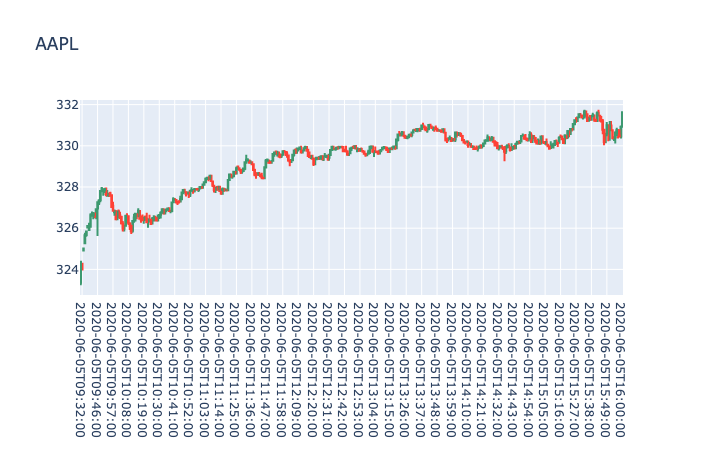

In [36]:
# %matplotlib inline 

dfChart = av_df

fig = go.Figure(data=[go.Candlestick(x=dfChart.index,
                open=dfChart['1. open'], high=dfChart['2. high'],
                low=dfChart['3. low'], close=dfChart['4. close'])
                     ])

#add xaxis_type='category' and fig.update_xaxes(autorange="reversed") to remove the datetime gaps
fig.update_layout(xaxis_type='category', xaxis_rangeslider_visible=False, title_text=ticker)
fig.update_xaxes(autorange="reversed")
fig.show()


The above chart is in showing candle stick 15-min interval.


## IEX Cloud

api [doc](https://iexcloud.io/docs/api/#intraday-prices)

In [6]:
from urllib.request import urlopen
import json

def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)



In [20]:

ticker= 'AAPL'
date = '20200605'

iex_token = 'put your key here'
chartIEXOnly=True

# intra day data
url = f"https://cloud.iexapis.com/stable/stock/{ticker}/intraday-prices/date/{date}?token={iex_token}&chartIEXOnly={chartIEXOnly}"
data = get_jsonparsed_data(url)
# print is very long
# print(data)

iex_df = json_normalize(data)
print(iex_df.shape)
print(iex_df.head(15))


(390, 11)
          date minute     label     high      low     open    close  average  \
0   2020-06-05  09:30  09:30 AM  324.210  323.380  323.380  324.190  323.803   
1   2020-06-05  09:31  09:31 AM  324.310  324.180  324.310  324.180  324.281   
2   2020-06-05  09:32  09:32 AM  324.130  324.130  324.130  324.130  324.130   
3   2020-06-05  09:33  09:33 AM  324.280  323.810  323.810  324.280  324.033   
4   2020-06-05  09:34  09:34 AM  324.775  324.500  324.500  324.775  324.637   
5   2020-06-05  09:35  09:35 AM  324.950  324.635  324.720  324.950  324.760   
6   2020-06-05  09:36  09:36 AM  325.700  325.265  325.310  325.700  325.437   
7   2020-06-05  09:37  09:37 AM  325.880  325.880  325.880  325.880  325.880   
8   2020-06-05  09:38  09:38 AM  326.140  325.880  325.900  326.140  325.959   
9   2020-06-05  09:39  09:39 AM  326.175  326.035  326.175  326.035  326.082   
10  2020-06-05  09:40  09:40 AM  326.725  326.170  326.170  326.720  326.447   
11  2020-06-05  09:41  09:41 A

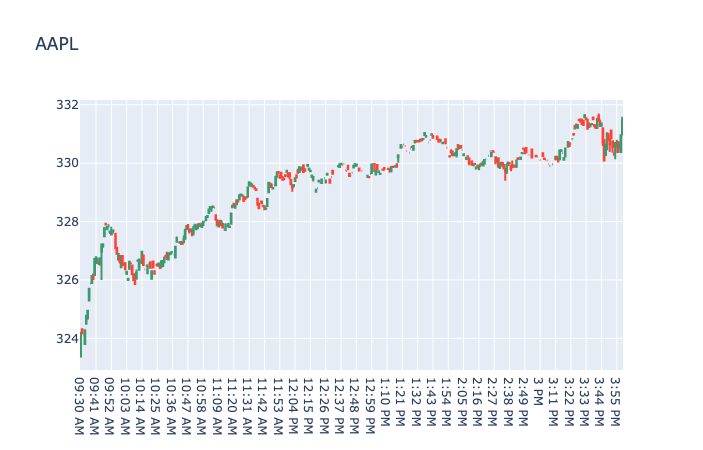

In [24]:

dfChart = iex_df

fig = go.Figure(data=[go.Candlestick(x=dfChart['label'],
                open=dfChart['open'], high=dfChart['high'],
                low=dfChart['low'], close=dfChart['close'])
                     ])

#add xaxis_type='category' and fig.update_xaxes(autorange="reversed") to remove the datetime gaps
fig.update_layout(xaxis_type='category', xaxis_rangeslider_visible=False, title_text=ticker)
# fig.update_xaxes(autorange="reversed")
fig.show()

The above chart is in showing candle stick 1-min interval.

### We can see visualily that it's different from vantage's chart. Need to find out why!

Their amount of data is pretty much the same, with AV 387 samples, and IEX 390 samples.


num of samples:  387


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0.5, 1.0, 'overlay the close price for AV and IEX')

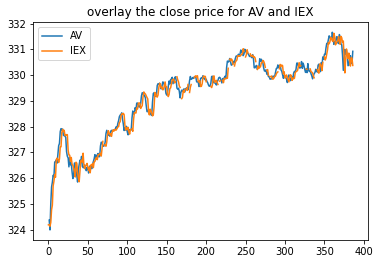

In [62]:
# compare the two api output 
# %matplotlib inline
# %matplotlib widget

data_to_compare = 'close'

av_close = av_df['4. close']
iex_close = iex_df['close']


shorter_len = min(av_close.shape[0], iex_close.shape[0])
print('num of samples: ', shorter_len)
plt.plot(np.arange(shorter_len-1, 0, -1), av_close[1:shorter_len], label='AV')
plt.plot(np.arange(shorter_len), iex_close[:shorter_len], label='IEX')
plt.legend()
plt.title('overlay the close price for AV and IEX')



From the above plot, we can see that they pretty much align. I need to zoom into the plot to check in the details more, after I figure out the issue with matplotlib widget.


## Financial modeling prep

In [ ]:

ticker= 'AAPL'
# date = '20200605'

fmp_token = 'put your key here'
url = f"https://financialmodelingprep.com///api/v3/historical-price-full/{ticker}?apikey={fmp_token}")
data = get_jsonparsed_data(url)
# print is very long
# print(data)
